In [ ]:
import random

# Thiết lập seed cố định để tái tạo kết quả
random.seed(665)

# Chọn một số ngẫu nhiên trong khoảng từ 1 đến 10 (bao gồm 1 và 10)
random_number = random.randint(1, 10)

print(random_number)


9


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rossman_store.csv to rossman_store.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rossman_train.csv to rossman_train.csv


In [ ]:
import pandas as pd
trained_data=pd.read_csv('rossman_train.csv')
store_data=pd.read_csv('rossman_store.csv')
data=pd.merge(trained_data,store_data,how='left',on='Store')
data

<ipython-input-4-8071343bfa7f>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trained_data=pd.read_csv('rossman_train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**XỬ LÝ MISSING VALUES**

In [ ]:
data.describe()
print("Hàng: ",data.shape[0])
print("Cột: ",data.shape[1])
print("Features: ",data.columns.tolist())
data.isnull().sum()

Hàng:  1017209
Cột:  18
Features:  ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


Nhận xét: dữ liệu có thể là do bị thiếu nên sẽ để giá trị là mean chứ không xóa, vì đây là dữ liệu thiếu chứ không phải dữ liệu bằng 0

đo lường xem copetitiondistance, competitionopensincemonth, competitionopenyear thiếu là do đâu. Nếu giá trị của competitiondistance là nan thì xác xuất CompetitionOpenSinceMonth cũng là NaN là bao nhiêu

In [ ]:
import pandas as pd

# Lọc ra các hàng có NaN trong cột 'CompetitionDistance'
data_nan_distance = data[data['CompetitionDistance'].isna()]

# Tính số lượng hàng có NaN trong 'CompetitionOpenSinceMonth' khi 'CompetitionDistance' là NaN
nan_open_since_month = data_nan_distance['CompetitionOpenSinceMonth'].isna().sum()

# Tính số lượng hàng có NaN trong 'CompetitionOpenSinceYear' khi 'CompetitionDistance' là NaN
nan_open_since_year = data_nan_distance['CompetitionOpenSinceYear'].isna().sum()

# Tính tổng số hàng có NaN trong 'CompetitionDistance'
total_nan_distance = data_nan_distance.shape[0]

# Tính xác suất
probability_open_since_month = (nan_open_since_month / total_nan_distance) * 100 if total_nan_distance > 0 else 0
probability_open_since_year = (nan_open_since_year / total_nan_distance) * 100 if total_nan_distance > 0 else 0

# In kết quả
print(f"Probability that CompetitionOpenSinceMonth is NaN given CompetitionDistance is NaN: {probability_open_since_month:.2f}%")
print(f"Probability that CompetitionOpenSinceYear is NaN given CompetitionDistance is NaN: {probability_open_since_year:.2f}%")


Probability that CompetitionOpenSinceMonth is NaN given CompetitionDistance is NaN: 100.00%
Probability that CompetitionOpenSinceYear is NaN given CompetitionDistance is NaN: 100.00%


In [ ]:
# Xóa các dòng có NaN trong cột CompetitionDistance
data.dropna(subset=['CompetitionDistance'], inplace=True)

In [ ]:
print("Hàng: ",data.shape[0])
print("Cột: ",data.shape[1])

Hàng:  1014567
Cột:  18


In [ ]:
# Điền giá trị NaN trong CompetitionOpenSinceMonth và CompetitionOpenSinceYear bằng giá trị trung bình (mean)
data['CompetitionOpenSinceMonth'].fillna(data['CompetitionOpenSinceMonth'].mean(), inplace=True)
data['CompetitionOpenSinceYear'].fillna(data['CompetitionOpenSinceYear'].mean(), inplace=True)

<ipython-input-6-381483b08750>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionOpenSinceMonth'].fillna(data['CompetitionOpenSinceMonth'].mean(), inplace=True)
<ipython-input-6-381483b08750>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
# Lọc ra các dòng có giá trị Promo2 bằng 0
promo2_zero = data[data['Promo2'] == 0]

# Tính xác suất các cột Promo2SinceWeek, Promo2SinceYear, và PromoInterval là NaN
prob_promo2sinceweek_nan = promo2_zero['Promo2SinceWeek'].isna().mean()
prob_promo2sinceyear_nan = promo2_zero['Promo2SinceYear'].isna().mean()
prob_promointerval_nan = promo2_zero['PromoInterval'].isna().mean()

# In kết quả xác suất
print(f"Probability that Promo2SinceWeek is NaN when Promo2 is 0: {prob_promo2sinceweek_nan * 100:.2f}%")
print(f"Probability that Promo2SinceYear is NaN when Promo2 is 0: {prob_promo2sinceyear_nan * 100:.2f}%")
print(f"Probability that PromoInterval is NaN when Promo2 is 0: {prob_promointerval_nan * 100:.2f}%")


Probability that Promo2SinceWeek is NaN when Promo2 is 0: 100.00%
Probability that Promo2SinceYear is NaN when Promo2 is 0: 100.00%
Probability that PromoInterval is NaN when Promo2 is 0: 100.00%


In [ ]:
# Thay NaN trong các cột liên quan đến khuyến mãi bằng 0
data['Promo2SinceWeek'].fillna(0, inplace=True)
data['Promo2SinceYear'].fillna(0, inplace=True)
data['PromoInterval'].fillna(0, inplace=True)


<ipython-input-7-977be5ed30ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Promo2SinceWeek'].fillna(0, inplace=True)
<ipython-input-7-977be5ed30ad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
data.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


**XỬ LÝ CHUỖI DATE**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [ ]:
data=data.drop('Date',axis=1)

**MÃ HÓA CÁC CỘT**

In [ ]:

# Chuyển cột 'PromoInterval' thành kiểu chuỗi
data['PromoInterval'] = data['PromoInterval'].astype(str)

# Sau đó thay thế '0' bằng 'Unknown'
data['PromoInterval'] = data['PromoInterval'].replace('0', 'Unknown')



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['PromoInterval']=le.fit_transform(data['PromoInterval'])

In [ ]:
data['StoreType']=le.fit_transform(data['StoreType'])
data['Assortment']=le.fit_transform(data['Assortment'])
data['StateHoliday']=data['StateHoliday'].apply(lambda x:0 if str(x)=='0' else 1)

**XỬ LÝ NGOẠI LAI VỚI FEATURES SỐ LIỆU**

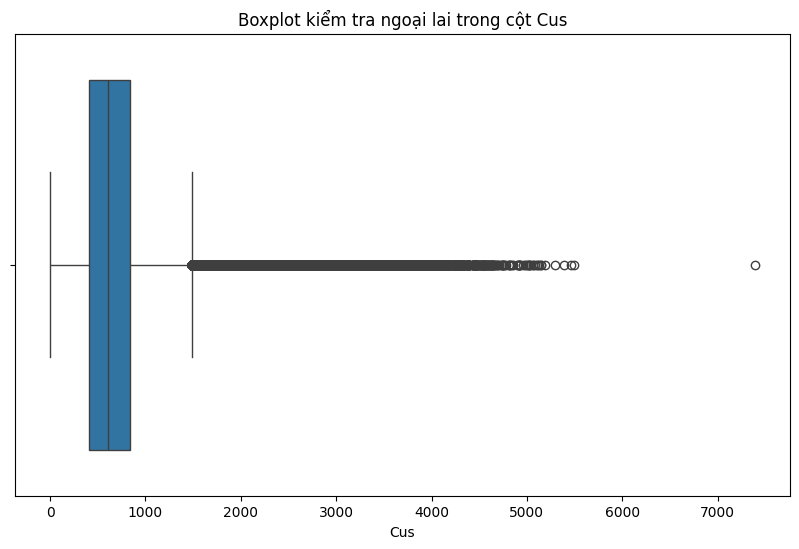

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Customers'])
plt.title('Boxplot kiểm tra ngoại lai trong cột Cus')
plt.xlabel('Cus')
plt.show()


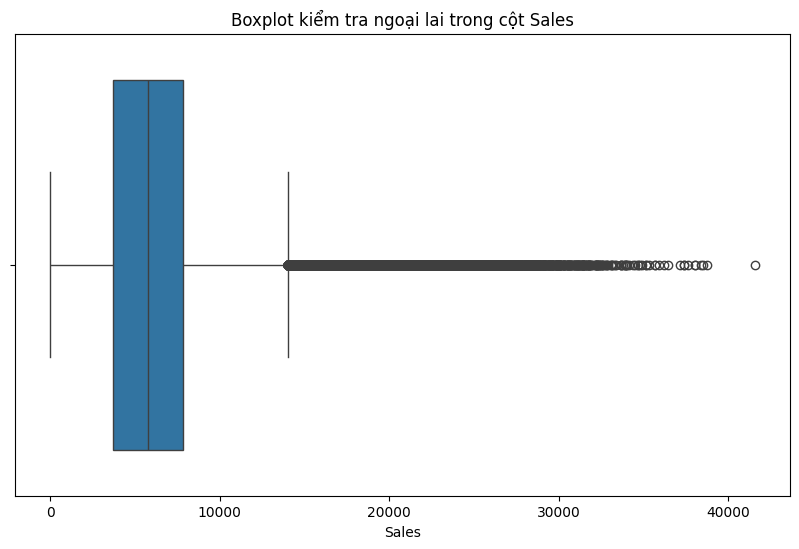

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có một DataFrame df với cột 'Sales'
# Ví dụ: df = pd.read_csv("your_data.csv")

# Tạo boxplot để kiểm tra ngoại lai trong cột 'Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sales'])

# Thêm tiêu đề và nhãn cho các trục
plt.title('Boxplot kiểm tra ngoại lai trong cột Sales')
plt.xlabel('Sales')

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Tính doanh thu trung bình theo ngày lễ và không phải ngày lễ
holiday_sales = data.groupby('StateHoliday')['Sales'].describe()
print(holiday_sales)


                 count         mean          std  min     25%     50%     75%  \
StateHoliday                                                                    
0             986159.0  5947.483893  3767.890619  0.0  3967.0  5849.0  7936.0   
1              31050.0   258.159581  1813.752718  0.0     0.0     0.0     0.0   

                  max  
StateHoliday           
0             41551.0  
1             38722.0  


Ngày lễ doanh thu thấp hơn

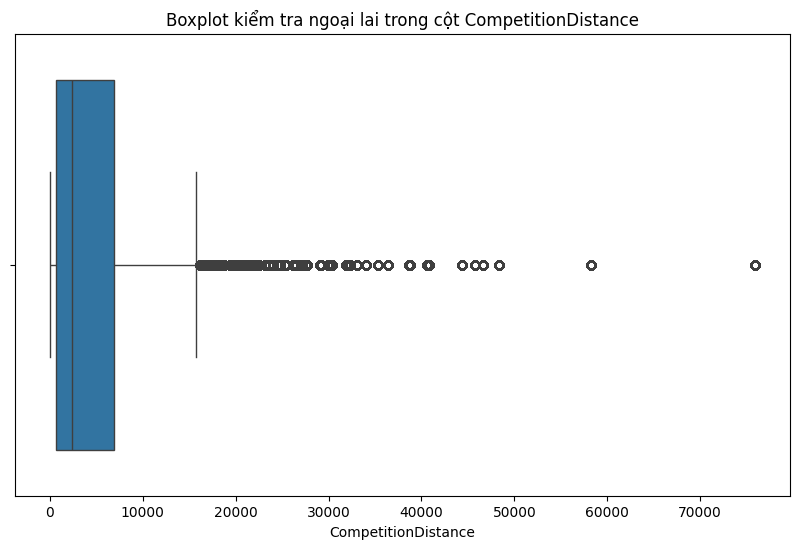

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['CompetitionDistance'])
plt.title('Boxplot kiểm tra ngoại lai trong cột CompetitionDistance')
plt.xlabel('CompetitionDistance')
plt.show()


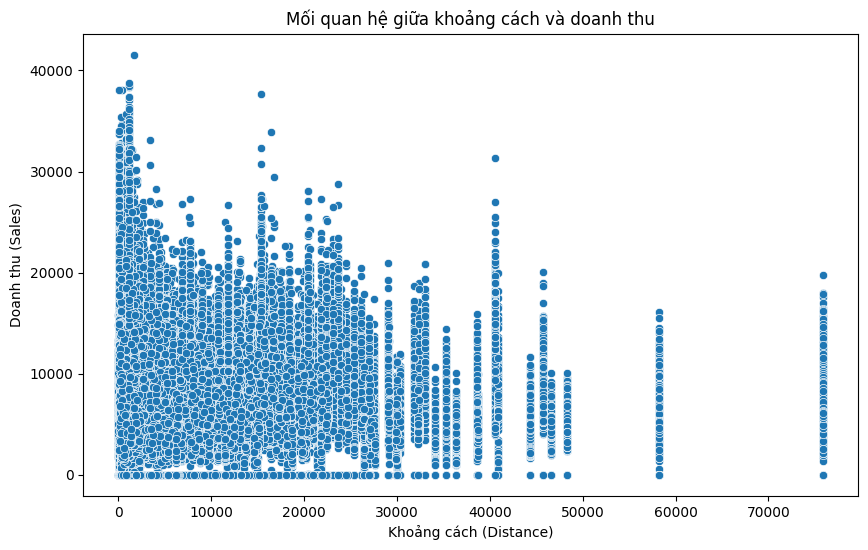

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['CompetitionDistance'], y=data['Sales'])

# Thêm tiêu đề và nhãn cho các trục
plt.title('Mối quan hệ giữa khoảng cách và doanh thu')
plt.xlabel('Khoảng cách (Distance)')
plt.ylabel('Doanh thu (Sales)')

# Hiển thị biểu đồ
plt.show()


Sử dụng Rubost Scale

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(data[['Sales', 'Customers', 'CompetitionDistance']])


In [ ]:
# Tính trung bình và phân phối doanh thu theo ngày trong tuần
weekday_sales = data.groupby('DayOfWeek')['Sales'].describe()
print(weekday_sales)


              count         mean          std  min      25%     50%     75%  \
DayOfWeek                                                                     
1          144730.0  7809.044510  4016.526273  0.0  5235.00  7310.0  9972.0   
2          145664.0  7005.244467  3142.039607  0.0  4904.00  6463.0  8491.0   
3          145665.0  6555.884138  2944.377501  0.0  4718.00  6133.0  7926.0   
4          145845.0  6247.575913  3209.806360  0.0  4536.00  6020.0  7792.0   
5          145845.0  6723.274305  3101.006008  0.0  4975.00  6434.0  8206.0   
6          144730.0  5847.562599  2873.985615  0.0  3899.25  5410.0  7220.0   
7          144730.0   204.183189  1613.243517  0.0     0.00     0.0     0.0   

               max  
DayOfWeek           
1          41551.0  
2          34692.0  
3          33151.0  
4          38367.0  
5          38722.0  
6          31683.0  
7          37376.0  


**KIỂM TRA IMBALANCED**

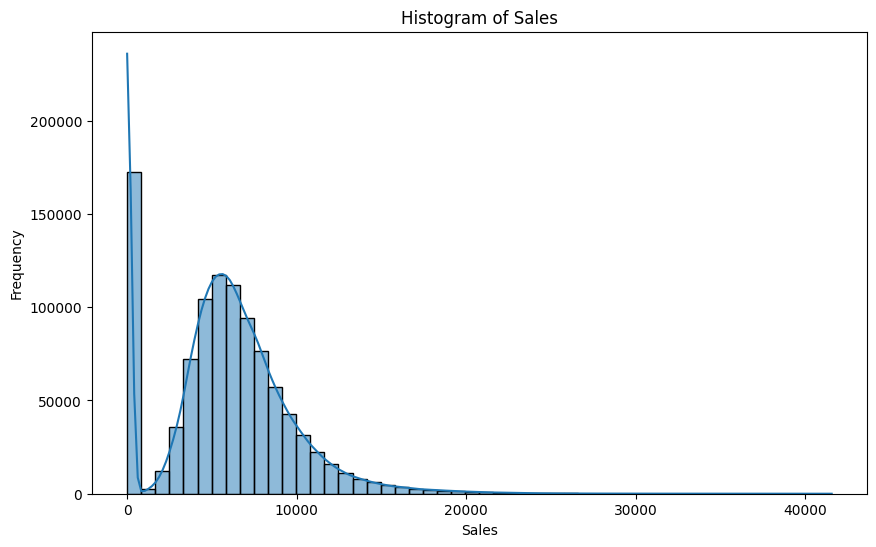

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ histogram để kiểm tra phân phối của Sales
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'], kde=True, bins=50)  # 'Sales' là tên cột mục tiêu của bạn
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



**VISUALIZATION**

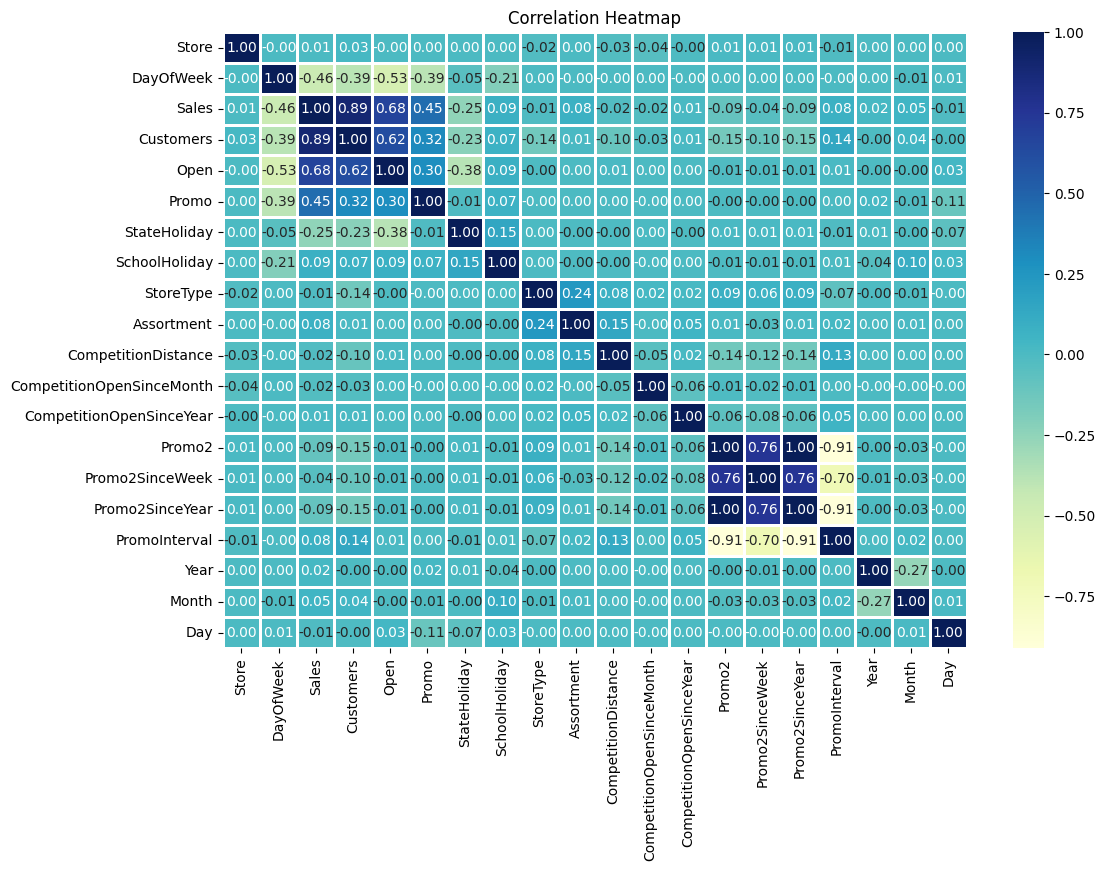

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))  # Điều chỉnh kích thước (width, height)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-22-5a22fc6fa4fe>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var,
<ipython-input-22-5a22fc6fa4fe>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var,
<ipython-input-22-5a22fc6fa4fe>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var,
<ipython-input-22-5a22fc6fa4fe>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var,
<ipython-input-22-5a22fc6fa4fe>:

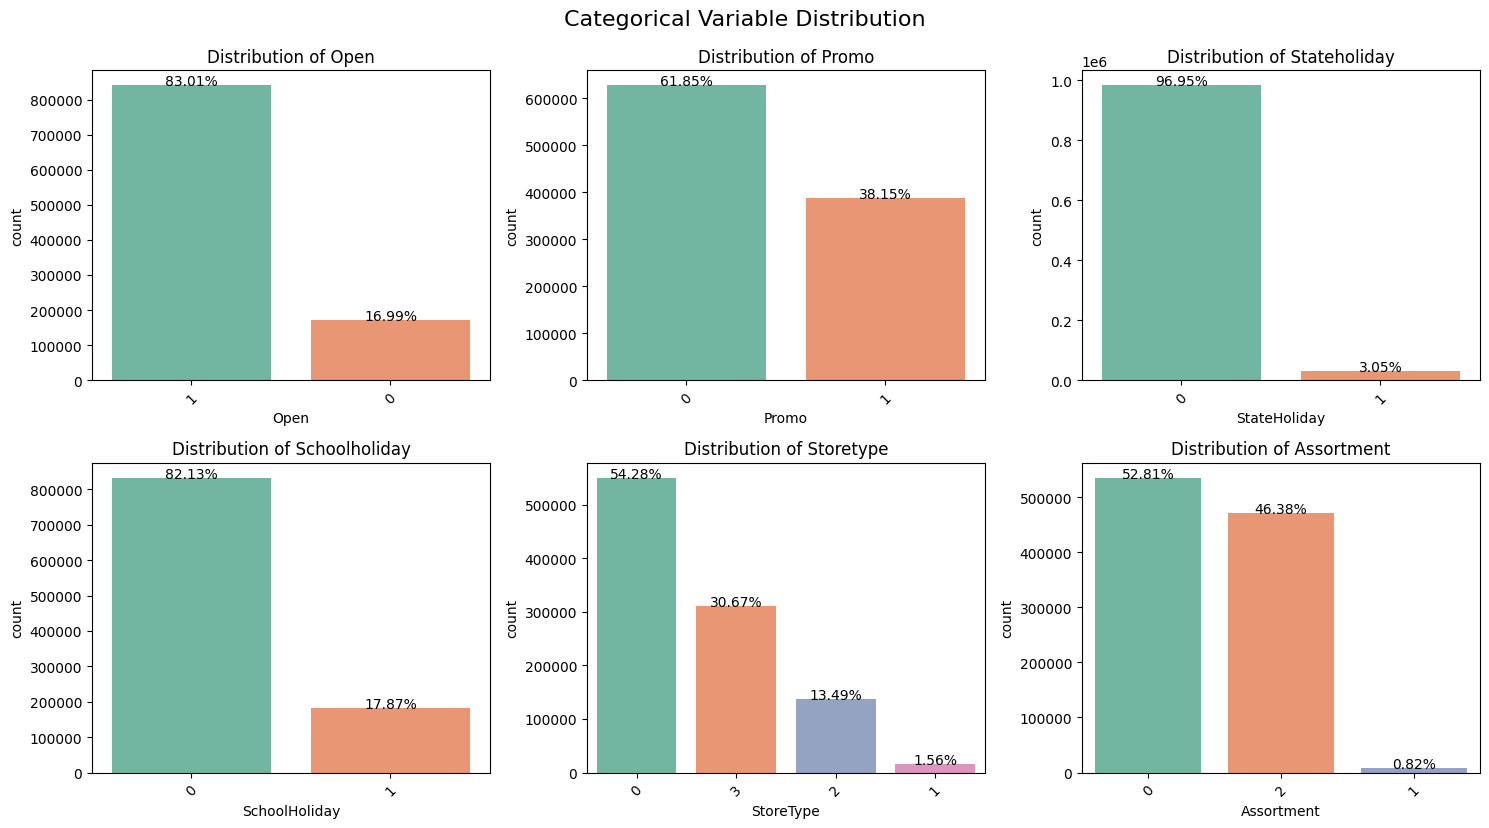

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_var = ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']

def catego(df, columns_to_plot, rows=3, columns=2, hue=None):
    """
    Hàm vẽ biểu đồ phân phối các biến phân loại trong DataFrame.
    Mỗi biểu đồ sẽ hiển thị số lượng (count) của các giá trị trong cột tương ứng,
    kèm theo tỷ lệ phần trăm trên mỗi thanh.

    Parameters:
    - df: DataFrame chứa dữ liệu.
    - columns_to_plot: Danh sách các tên cột phân loại trong DataFrame mà bạn muốn vẽ biểu đồ.
    - rows: Số lượng hàng của các biểu đồ (mặc định là 3).
    - columns: Số lượng cột của các biểu đồ (mặc định là 2).
    - hue: Tên cột phân loại bổ sung để phân nhóm dữ liệu theo màu sắc (mặc định là None).
    """

    # Tạo một figure với số lượng subplot theo rows và columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, 8))
    axes = axes.flatten()  # Làm phẳng mảng axes để có thể duyệt dễ dàng hơn

    # Duyệt qua từng cột cần vẽ biểu đồ
    for i, var in enumerate(columns_to_plot):
        ax = axes[i]  # Chọn subplot cho cột hiện tại

        # Vẽ biểu đồ countplot
        sns.countplot(x=var,
                      data=df,
                      ax=ax,
                      hue=hue,
                      order=df[var].value_counts().index,  # Sắp xếp theo số lượng giảm dần
                      palette="Set2")  # Chọn palette màu đẹp mắt

        ax.set_title(f'Distribution of {var.capitalize()}')  # Tiêu đề của biểu đồ
        ax.tick_params(axis='x', rotation=45)  # Xoay nhãn trục X nếu cần

        # Tính tỷ lệ phần trăm và hiển thị lên các thanh
        total_count = len(df[var])  # Tổng số phần tử trong cột
        for p in ax.patches:  # Lặp qua các thanh trong biểu đồ
            height = p.get_height()  # Chiều cao của thanh
            percentage = (height / total_count) * 100  # Tính tỷ lệ phần trăm
            ax.text(p.get_x() + p.get_width() / 2.,  # Vị trí X của văn bản
                    height + 2,  # Vị trí Y của văn bản (thêm một chút trên thanh)
                    f'{percentage:.2f}%',  # Hiển thị tỷ lệ phần trăm
                    ha='center',  # Căn giữa văn bản
                    fontsize=10)  # Kích thước chữ cho tỷ lệ phần trăm

    # Căn chỉnh các biểu đồ để không bị chồng lên nhau
    plt.tight_layout()
    plt.suptitle("Categorical Variable Distribution", fontsize=16, y=1.03)  # Tiêu đề chung cho tất cả biểu đồ
    plt.show()

# Gọi hàm để vẽ các biểu đồ
catego(data, cat_var, rows=2, columns=3)


 ***Doanh thu bị ảnh hưởng bởi các yếu tố StateHoliday, CompetitionDistance, Promo***

<ipython-input-15-02dbf4462296>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateHoliday', y='Sales', data=data, palette="coolwarm_r")  # Màu sắc nổi bật
<ipython-input-15-02dbf4462296>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompetitionDistance', y='Sales', data=data, palette="magma")  # Màu sắc nổi bật
<ipython-input-15-02dbf4462296>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=data, palette="viridis")  # Màu sắc nổi bật


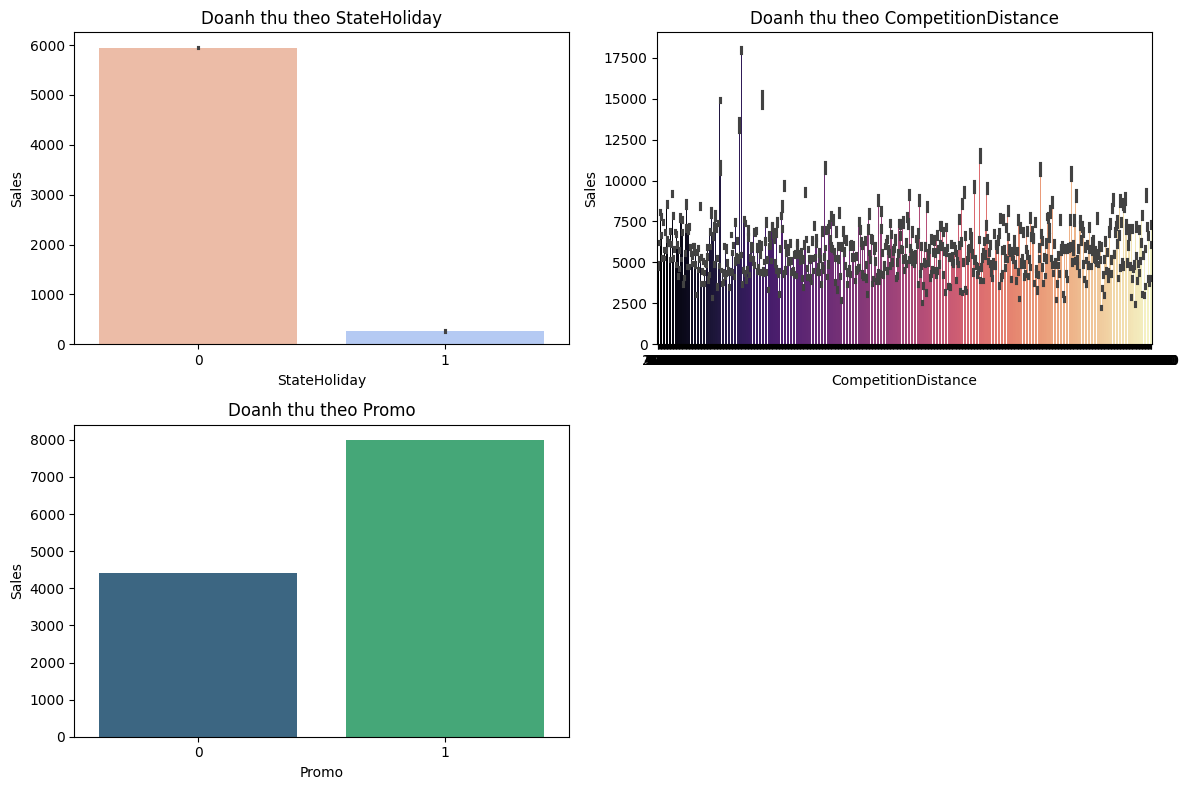

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
# 1. Biểu đồ cột cho StateHoliday vs Doanh thu
plt.subplot(2, 2, 1)
sns.barplot(x='StateHoliday', y='Sales', data=data, palette="coolwarm_r")  # Màu sắc nổi bật
plt.title('Doanh thu theo StateHoliday')

# 2. Biểu đồ cột cho CompetitionDistance vs Doanh thu
plt.subplot(2, 2, 2)
sns.barplot(x='CompetitionDistance', y='Sales', data=data, palette="magma")  # Màu sắc nổi bật
plt.title('Doanh thu theo CompetitionDistance')

# 3. Biểu đồ cột cho Promo vs Doanh thu
plt.subplot(2, 2, 3)
sns.barplot(x='Promo', y='Sales', data=data, palette="viridis")  # Màu sắc nổi bật
plt.title('Doanh thu theo Promo')

plt.tight_layout()
plt.show()


In [ ]:
# Lọc các bản ghi có StateHoliday = 1
state_holiday_data = data[data['StateHoliday'] == 1]

# Tính số cửa hàng đóng cửa trong các ngày lễ (Open = 0)
closed_on_holiday = state_holiday_data[state_holiday_data['Open'] == 0].shape[0]

# Tính tổng số cửa hàng trong các ngày lễ
total_on_holiday = state_holiday_data.shape[0]

# Tính xác suất cửa hàng đóng cửa trong các ngày lễ
probability_closed_on_holiday = closed_on_holiday / total_on_holiday
print(probability_closed_on_holiday)


0.9707098107601886


***Các chương trình quảng cáo thực hiện vào thời gian nào thì sẽ tăng doanh thu hơn?***

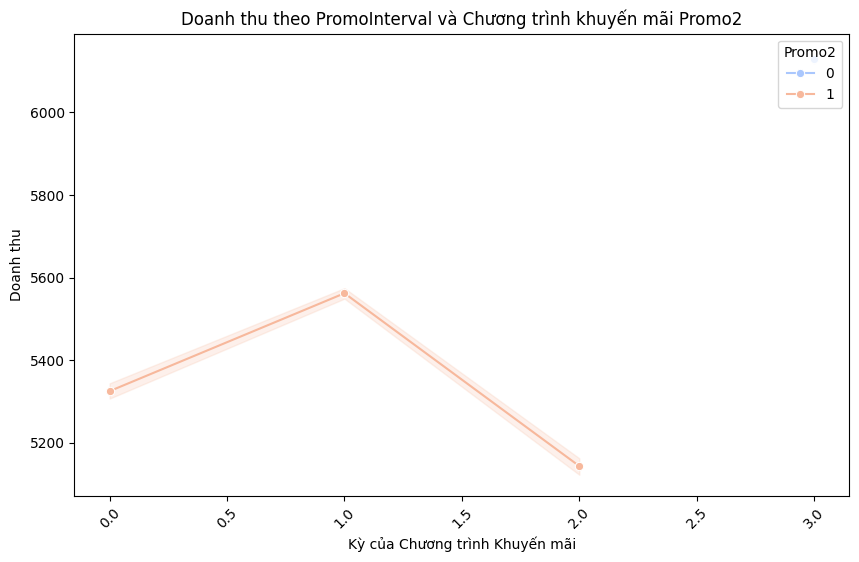

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='PromoInterval', y='Sales', data=data, hue='Promo2', marker='o', palette="coolwarm")
plt.title('Doanh thu theo PromoInterval và Chương trình khuyến mãi Promo2')
plt.xlabel('Kỳ của Chương trình Khuyến mãi')
plt.ylabel('Doanh thu')
plt.legend(title='Promo2', loc='upper right')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x nếu cần để dễ đọc
plt.show()


***Loại cửa hàng nào có doanh thu cao nhất***

<ipython-input-23-7ceb834d5442>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=data, palette="muted")


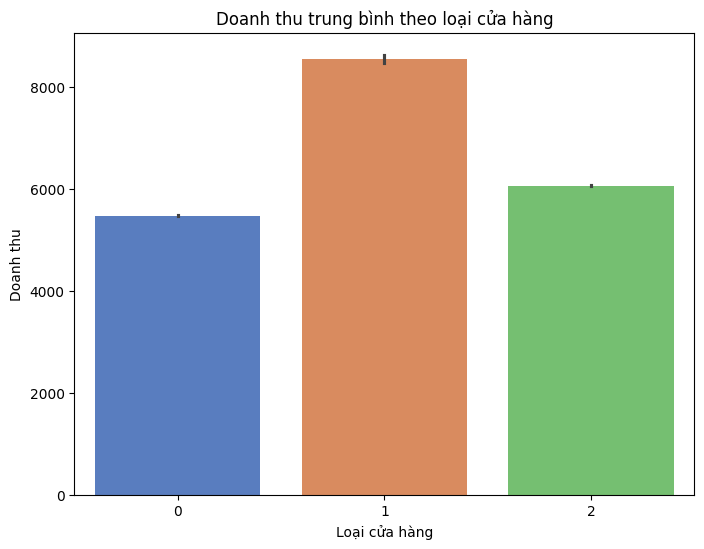

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=data, palette="muted")
plt.title('Doanh thu trung bình theo loại cửa hàng')
plt.xlabel('Loại cửa hàng')
plt.ylabel('Doanh thu')
plt.show()

***Các ngày trong tuần mở cửa có ảnh hưởng tới doanh thu không***

<ipython-input-16-c43efe732c3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=data, palette="Blues")


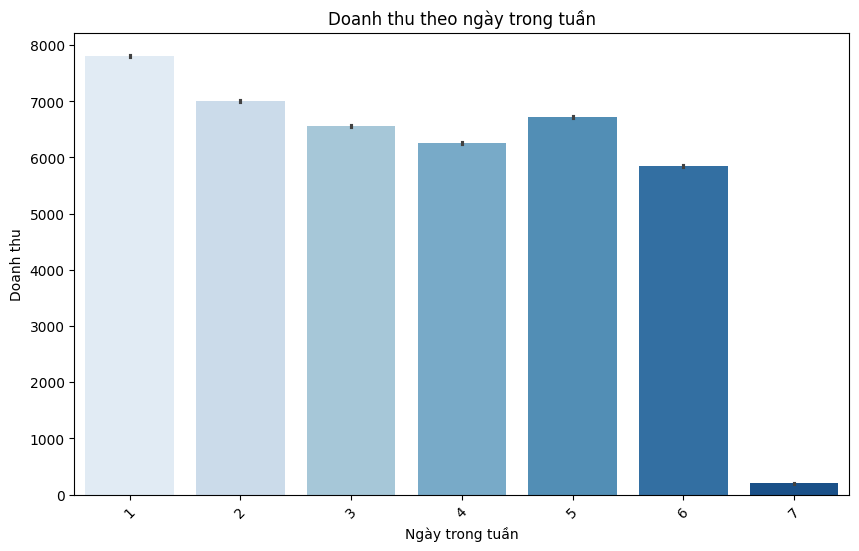

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=data, palette="Blues")
plt.title('Doanh thu theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.show()


***Việc thực hiện chương trình quảng cáo liên tục (Promo2=1) có giúp doanh thu cao hơn không?***

<ipython-input-18-4b3b47ef6c5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo2', y='Sales', data=data, palette="Set1")


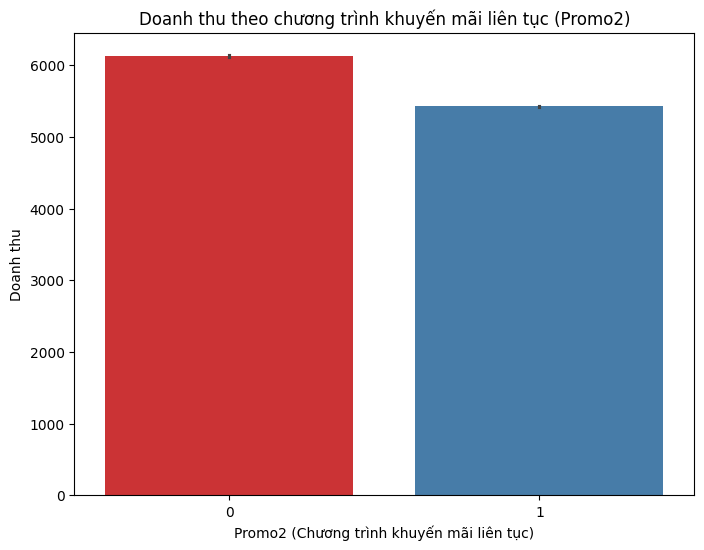

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo2', y='Sales', data=data, palette="Set1")
plt.title('Doanh thu theo chương trình khuyến mãi liên tục (Promo2)')
plt.xlabel('Promo2 (Chương trình khuyến mãi liên tục)')
plt.ylabel('Doanh thu')
plt.show()

**SỬ DỤNG MÔ HÌNH DỰ ĐOÁN SALES**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = data.drop('Sales', axis=1)  # Loại bỏ cột 'Sales' làm đặc trưng
y = data['Sales']  # Cột mục tiêu

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Linear Regression***

In [ ]:

# Khởi tạo mô hình Linear Regression
lr_model = LinearRegression()

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train, y_train)

# Dự đoán
y_pred_lr = lr_model.predict(X_test)

# Đánh giá mô hình Linear Regression
print("Linear Regression Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("R-squared (R2):", r2_score(y_test, y_pred_lr))

Linear Regression Evaluation:
Mean Absolute Error (MAE): 942.1434305938477
Mean Squared Error (MSE): 1923735.4887436898
R-squared (R2): 0.8701901422102318


***Random Forests Regression***

In [ ]:

# **1. Random Forest Regressor**

# Khởi tạo mô hình RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình RandomForest
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình RandomForest
print("Random Forest Regressor Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))

Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 262.73434129729833
Mean Squared Error (MSE): 185587.8994363026
R-squared (R2): 0.9874768963954285


***Gradient Boosting Machines ( GBM)***

In [ ]:
# Khởi tạo mô hình GradientBoosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình GradientBoosting
gb_model.fit(X_train, y_train)

# Dự đoán
y_pred_gb = gb_model.predict(X_test)

# Đánh giá mô hình GradientBoosting
print("\nGradient Boosting Regressor Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("R-squared (R2):", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Evaluation:
Mean Absolute Error (MAE): 673.8388425370149
Mean Squared Error (MSE): 937021.7316804024
R-squared (R2): 0.9367716307948398


***XGBoost***

In [ ]:
# **2. XGBoost**

# Khởi tạo mô hình XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình XGBoost
xgb_model.fit(X_train, y_train)

# Dự đoán
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá mô hình XGBoost
print("\nXGBoost Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_xgb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb))
print("R-squared (R2):", r2_score(y_test, y_pred_xgb))


XGBoost Evaluation:
Mean Absolute Error (MAE): 354.9670494704784
Mean Squared Error (MSE): 265521.5623499198
R-squared (R2): 0.9820831418037415


***CatBoost***

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 50.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Khởi tạo mô hình CatBoostRegressor
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=10,
    eval_metric='RMSE',
    random_seed=42,
    logging_level='Silent'
)

# Huấn luyện mô hình
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

# Dự đoán trên tập kiểm tra
y_pred_catboost = model.predict(X_test)

# Tính toán và in ra các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred_catboost)
mse = mean_squared_error(y_test, y_pred_catboost)
r2 = r2_score(y_test, y_pred_catboost)

print("\nCatBoost Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)



CatBoost Evaluation:
Mean Absolute Error (MAE): 272.76098365706815
Mean Squared Error (MSE): 169499.6925864817
R-squared (R2): 0.9885624967055998
